In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy

In [2]:
dx = 3; dz = 2; dm = 2;
M = 8 # number of landmarks M
N = 200 # number of poses X
observs_time = 2
K = observs_time*N # number of measurements Z

In [3]:
def plot_matrix(A):
    plt.figure(1, figsize=(20,20))
    plt.spy(A, marker='o', markersize=5)
    plt.grid()
    plt.title('Adjacency matrix $A$')

#     display('non zero elements in A = ',np.count_nonzero(A))
#     plt.figure(2)
#     Lambda = np.transpose(A) @ A # + np.eye(N+M)*0.001
#     plt.spy(Lambda, marker='o', markersize=5)
#     plt.title('Information matrix $\Lambda$')

#     plt.figure(3)
#     plt.spy(np.linalg.inv(Lambda), marker='o', markersize=5)
#     plt.title('Inverse of $\Lambda$: dense')
#     plt.show()

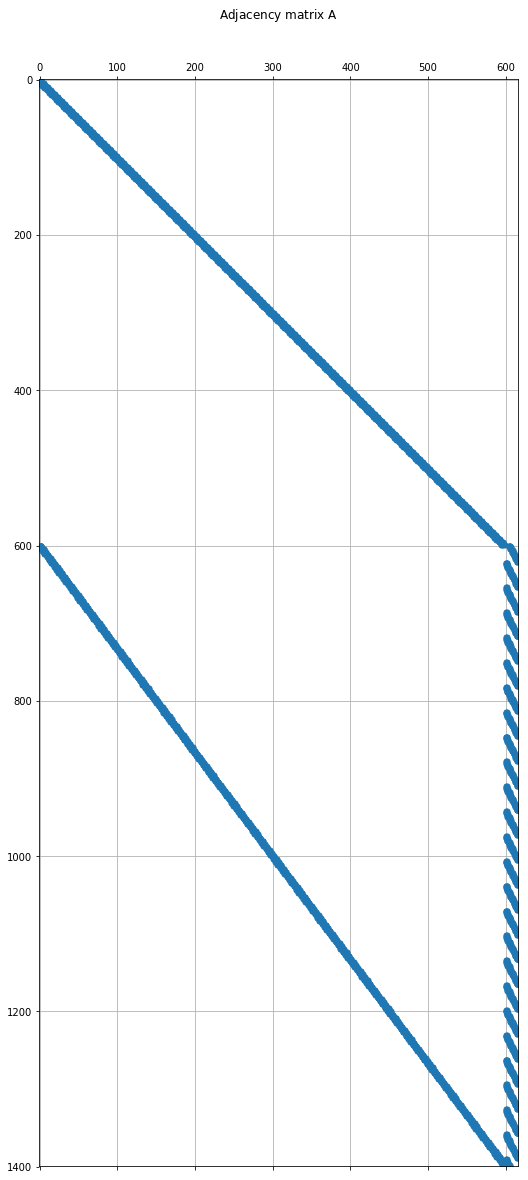

In [5]:
A = np.zeros((N*dx+K*dz,N*dx+M*dm))
I = np.eye(dx)
G = np.random.rand(dx,dx)
H = np.random.rand(dz,dx)
J = np.random.rand(dz,dm)
for i in range(N):
    A[dx*i:dx*(i+1),dx*i:dx*(i+1)] = I
for g in range(N-1):
    A[dx*(g+1):(g+2)*dx, dx*g:dx*(g+1)] = G

dM = 2
for h in range(N):
    for obs in range(observs_time):
        hr = dx*N+(obs+observs_time*h)*dz
        hc = dx*h
        A[hr:hr+dz, hc:hc+dx] = H
        jr = hr
        jc = dx*N+dm*(h+obs+dM)%(M*dm)
        A[jr:jr+dz, jc:jc+dm] = J

plot_matrix(A)

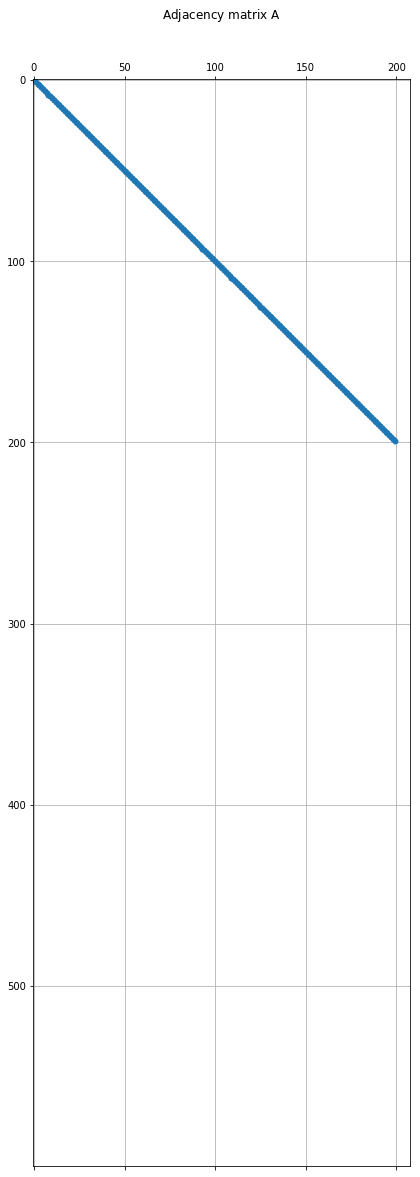

In [6]:
A00 = -np.eye(N); A01 = np.zeros((N,M))
A10 = np.zeros((K,N)); A11 = np.zeros((K,M))

A = np.block([[A00, A01],
             [A10, A11]])

plot_matrix(A)

## Raw Cholesky factorization $\Lambda = A^{\top}A$ and $R = Cholesky(\Lambda)$

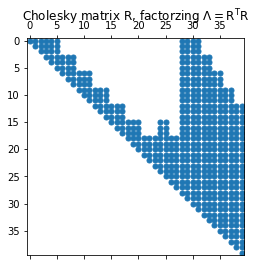

505

In [5]:
R = la.cholesky(Lambda, lower=False)
plt.figure(4)
plt.spy(R,marker='o', markersize=5)
plt.title('Cholesky matrix R, factorzing $\Lambda = R^{T}R$')
plt.show()
np.count_nonzero(R)

## Raw QR factorization $A = QR$

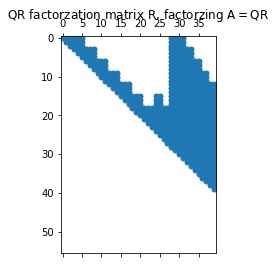

505

In [9]:
Q, R_ = la.qr(A,mode='full')
plt.figure(5)
plt.spy(R_,marker='o', markersize=5)
plt.title('QR factorzation matrix R, factorzing $A = QR$')
plt.show()
np.count_nonzero(R_)

### Problem simplifies to $Q^TA = Q^T R, b_{new} = Q^T R$

In [54]:
b = np.random.rand(A.shape[0])[np.newaxis].T
b_new = Q.T @ b

$R \delta = d$:

In [55]:
R = R_[:N*dx+M*dm,:]
d = b_new[:N*dx+M*dm]

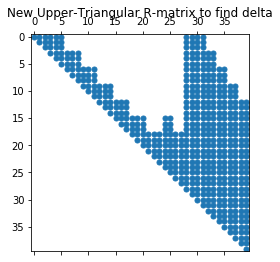

In [56]:
plt.spy(R,marker='o', markersize=5)
plt.title('New Upper-Triangular R-matrix to find delta')
plt.show()

Back substitution

In [57]:
def back_substitution(A, b):
    n = b.size
    x = np.zeros_like(b)

    for i in range(n-1, 0, -1):
        x[i] = A[i, i]/b[i]
        for j in range (i-1, 0, -1):
            A[i, i] += A[j, i]*x[i]
    return x

In [58]:
delta = back_substitution(R,d)

## Raw Schur complement $M^{-1} = \Lambda_x - \Lambda_{x,m} \Lambda_m^{-1} \Lambda_{m,x}$

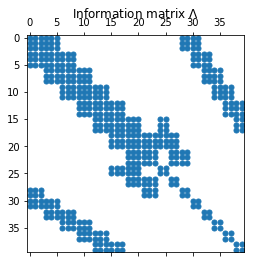

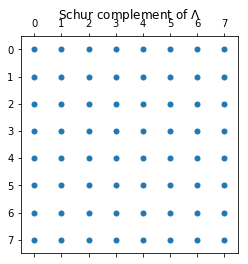

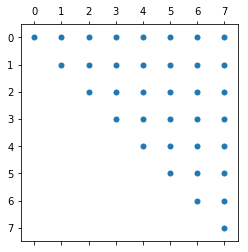

36

In [8]:
L_x = Lambda[:N,:N]
L_xm = Lambda[:N, N:]
L_mx = np.transpose(L_xm)
L_m = Lambda[N:,N:]
Sch = L_x - L_xm @ np.linalg.inv(L_m) @ L_mx #the inversion could be more efficient since it is diagonal
plt.figure()
plt.spy(Lambda, marker='o', markersize=5)
plt.title('Information matrix $\Lambda$')
plt.figure()
plt.spy(Sch,marker='o', markersize=5)
plt.title('Schur complement of $\Lambda$')
R_1 = la.cholesky(Sch, lower=False)
plt.figure()
plt.spy(R_1,marker='o', markersize=5)
plt.show()
np.count_nonzero(R_1)